# Importing Data

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [37]:
clickBait = pd.read_csv('/content/drive/MyDrive/DataCollection/clickbait.csv', error_bad_lines=False)
notClickBait = pd.read_csv('/content/drive/MyDrive/DataCollection/notClickbait.csv', error_bad_lines=False)

In [38]:
for like in clickBait["Likes"]:
  clickBait["Dislike-to-like-Ratio"] = clickBait["Dislikes"] / like

clickBait.head()

,ID,Video Title,Views,Likes,Dislikes,Favorites,Dislike-to-like-Ratio
0,5WTXHdc1_zI,10 People You Don't Want To Mess With,484411,3881,191,0.0,0.000100
1,hxwpkM5w3Cc,I Got Hunted By The FBI,42724724,2005151,24646,0.0,0.012940
2,aKkRwPGSWGQ,10 Real Life Giants You Won't Believe Exist,3674544,12116,1570,0.0,0.000824
3,81mXAkFEkMs,10 Real Life Giants You Won't Believe Exist,6890718,15222,2858,0.0,0.001501
4,9NQQKNAwaPk,10 Mythical CREATURES That Actually Existed,2089601,46750,1954,0.0,0.001026


In [39]:
for like in notClickBait["Likes"]:
  notClickBait["Dislike-to-like-Ratio"] = notClickBait["Dislikes"] / like

notClickBait.head()

,ID,Video Title,Views,Likes,Dislikes,Favorites,Dislike-to-like-Ratio
0,uocETPj4Jx4,"Extreme $500,000 Game Of Tag!",28527480,1912728,14689,0,1.070315
1,EgkUEKt_qmA,APEX LEGENDS MAKES NO SENSE 3,338383,23061,277,0,0.020184
2,5jyj5aJaLfc,Minecraft But Blocks Randomly Change When You ...,1119179,69823,1678,0,0.122268
3,5bQUqTsC0JA,I TOOK 10 PENALTIES AGAINST A PREMIER LEAGUE K...,1363546,98995,597,0,0.043500
4,A-Uva3rlc8s,"Minecraft, But You Can Shear Any Block...",1671133,71767,1788,0,0.130283


# Feature Analysis

The clickbait videos have a significantly weaker correlation among their numerical statistics than the non-Clickbait videos. 

This means that clickbait videos are much more likely to have a lot less balanced video statistics.

In [40]:
#Drop the favorites attribute because they're all zero
del notClickBait["Favorites"]
del clickBait["Favorites"]

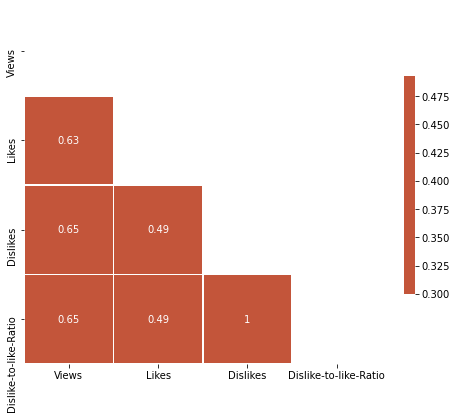

In [41]:
def display_correlation_matrix(data):
  """ Displays a correlation matrix for a dataset """
  corr = data.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  f, ax = plt.subplots(figsize=(8, 8))
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
	            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})
 
display_correlation_matrix(clickBait)

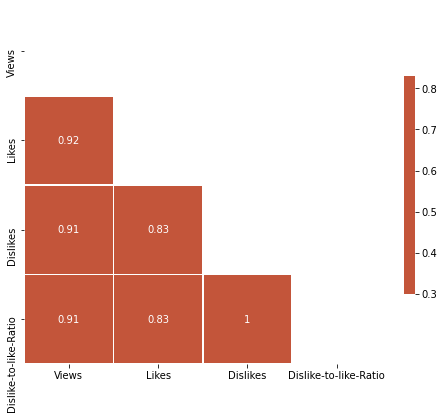

In [42]:
display_correlation_matrix(notClickBait)

The Dislike to Like Ratio will prove an important indicator of sentiment, and is modeled by a logarithmic distribution, thus dosen't need scaling to perform welll with the ML models unlike the other video statistics.

In [43]:
notClickBait["Dislike-to-like-Ratio"].describe()

count    100.000000
mean       0.144078
std        0.272478
min        0.004080
25%        0.020785
50%        0.057636
75%        0.131558
max        1.791242
Name: Dislike-to-like-Ratio, dtype: float64

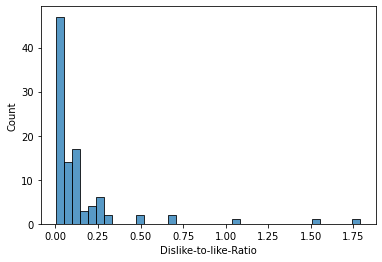

In [44]:
sns.histplot(notClickBait["Dislike-to-like-Ratio"])

In [45]:
clickBait["Dislike-to-like-Ratio"].describe()

count    101.000000
mean       0.013377
std        0.027736
min        0.000008
25%        0.000287
50%        0.003640
75%        0.014415
max        0.168838
Name: Dislike-to-like-Ratio, dtype: float64

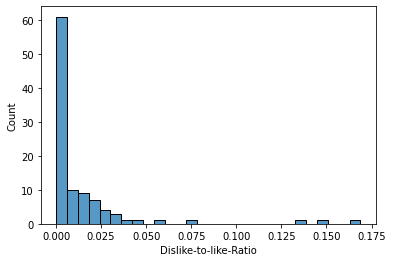

In [46]:
sns.histplot(clickBait["Dislike-to-like-Ratio"])

Clickbait videos have a significantly smaller range of 0.12 versus non-clickbait videos having a range of 1.75. 

This was the opposite of my initial belief that clickbait videos would have a larger range of dislike/like.

Clickbait Videos have a much wider distribution of dislikes, which makes sense as the viewer is likely to dislike a video after being mislead by its title and thumbnail. The Like distrubitions are fairly similar between clickbait and non-Clickbait videos. 

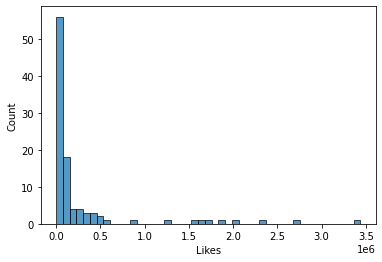

In [47]:
sns.histplot(clickBait["Likes"])

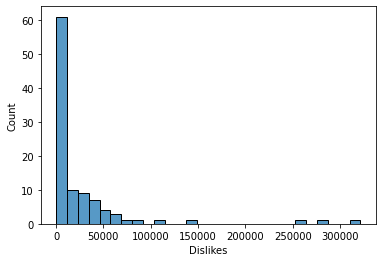

In [48]:
sns.histplot(clickBait["Dislikes"])

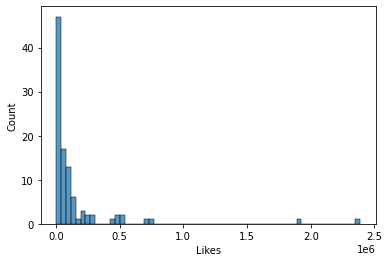

In [49]:
sns.histplot(notClickBait["Likes"])

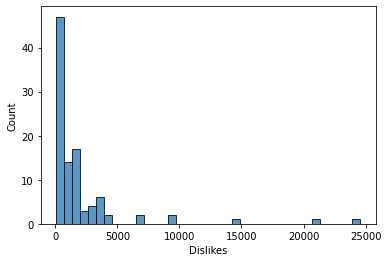

In [50]:
sns.histplot(notClickBait["Dislikes"])

Clickbait videos have a slightly larger distribution of views

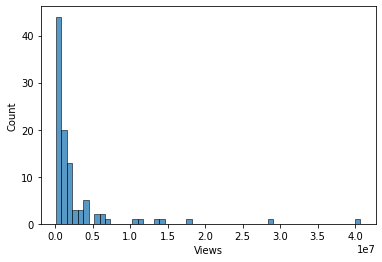

In [51]:
sns.histplot(notClickBait["Views"])

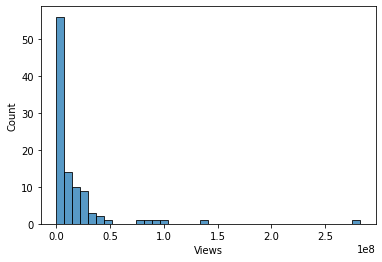

In [52]:
sns.histplot(clickBait["Views"])

In [53]:
import nltk
nltk.download("popular")
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [54]:
clickbaitTokens = []
nonClickbaitTokens = []

for i in range(len(clickBait)):
  tokens = word_tokenize(clickBait["Video Title"][i])
  for token in tokens:
    clickbaitTokens.append(token)

for i in range(len(notClickBait)):
  tokens = word_tokenize(notClickBait["Video Title"][i])
  for token in tokens:
    nonClickbaitTokens.append(token)

The Word Cloud of Clickbait titles will usually contain attention-grabbing verbs such as **belive, caught, hack, prank** to form titles like the classic: **You Won't Belive!**

While the Word Cloud of NonClickbait titles will have more mild nouns usually such as **highlights, games, and official**

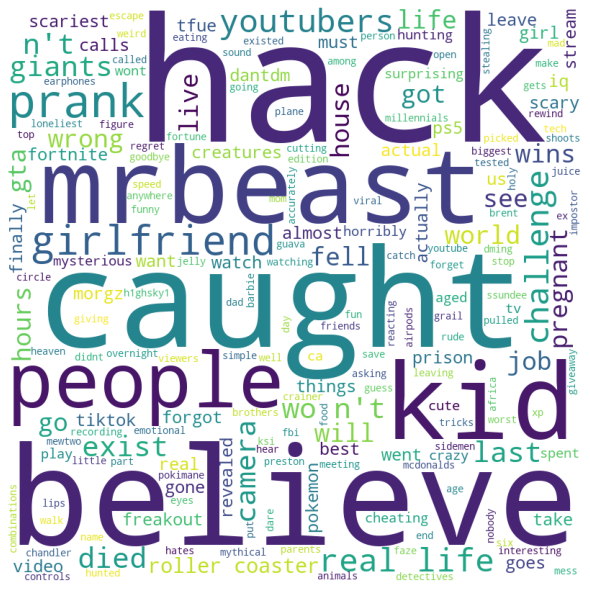

In [55]:
def display_WordCloud(tokens):
  """Creates a Word Cloud for @tokens, with all lowercase letters, with the font size of each word based on frequency """
  comment_words = ''
  stopwords = set(STOPWORDS)

  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
      
  comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  
  plt.show()

display_WordCloud(clickbaitTokens)

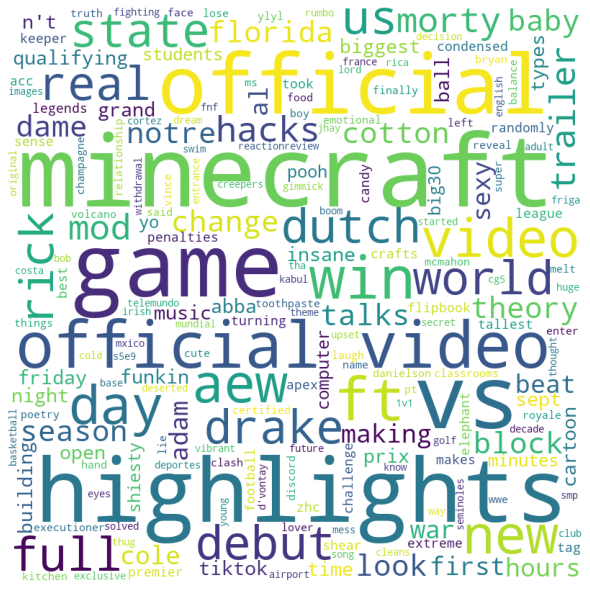

In [56]:
display_WordCloud(nonClickbaitTokens)

Key indicators of a clickbait thumbnail are often the use of brightly-colored arrows or circles, a strongly emotional or suprised facial expression of the video creator, contrasting primary colors, and a very unusual/unrealistic preview of the content which is often photoshopped

Non-Clickbait thumbnails are typically identified as having one or none of the features mentioned in the Clickbait thumbnails

Typical Clickbait Thumbnail:

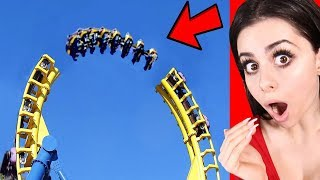

Non-Clickbait Thumbnail:

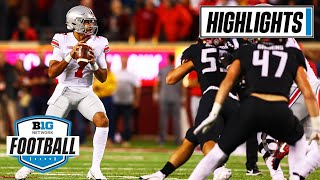

# Key Insights:

* Clickbait Videos are much more likely to have a lot less balanced video statistics due to their weaker correlations

* Clickbait Videos have a much wider distribution of dislikes, which makes sense as the viewer is likely to dislike a video after being mislead by its title and thumbnail.
  * Thus, Clickbait videos also have a significantly smaller distribution of Dislikes/Likes
* Clickbait titles will usually contain attention-grabbing verbs such as **belive, caught, hack, prank** to form titles like the classic: **You Won't Belive!** or **Prank/Hack Gone Wrong**

  * While NonClickbait titles will have more mild nouns usually such as **highlights, games, and official**

* Key indicators of a clickbait thumbnail are often the use of brightly-colored arrows or circles, a strongly emotional or suprised facial expression of the video creator, contrasting primary colors, and a very unusual/unrealistic preview of the content which is often photoshopped

  * Non-Clickbait thumbnails are typically identified as having one or none of the features mentioned in the Clickbait thumbnails